In [1]:
# encoding: utf-8
import pandas as pd
import pymongo
from pandas import DataFrame
import matplotlib.pyplot as plt

pd.set_option('display.width', None)  # 设置字符显示宽度
pd.set_option('display.max_rows', None)  # 设置显示最大行
pd.set_option('display.max_columns', None)  # 设置显示最大行

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

client = pymongo.MongoClient('localhost', 27017)
futures = client.futures2
market = futures.market
position = futures.position

start = '20200215'
end ='20200508'
symbol1 = 'BU2012'
symbol2 = 'BU2006'
BrokerID = '永安期货'
market1 = DataFrame(list(market.find({'date': {'$gte': start}, 'symbol':symbol1}))).drop_duplicates(['date','variety','symbol'], 'last')
market2 = DataFrame(list(market.find({'date': {'$gte': start}, 'symbol': symbol2}))).drop_duplicates(['date','variety','symbol'], 'last')
position1 = DataFrame(list(position.find({'date': {'$gte': start},'symbol': symbol1}))).dropna().drop_duplicates(['date','variety','symbol','long_party_name'], 'last')
position2 = DataFrame(list(position.find({'date': {'$gte': start},'symbol': symbol2,}))).dropna().drop_duplicates(['date','variety','symbol','long_party_name'], 'last')
# print(position2)
# 主力收盘
market1[symbol1] = market1['close']
# 次主力收盘
market2[symbol2] = market2['close']

#######
#position1
data3=position1[position1['long_party_name'] == BrokerID]
data3=data3[['date','symbol','long_party_name','long_openIntr']]
data3=data3.groupby(['date','symbol','long_party_name'])[['long_openIntr']].sum()
data4=position1[position1['short_party_name'] == BrokerID]
data4=data4[['date','symbol','short_party_name','short_openIntr']]
data4=data4.groupby(['date','symbol','short_party_name'])[['short_openIntr']].sum()
# #并集
data5=pd.merge(data3,data4, on=['date','symbol'],how='outer')
data5['会员简称']=data5.apply(lambda x: BrokerID,axis=1)
#nan缺失值填充fillna()为0
data5=data5.fillna(0)
#选择需要显示的字段
data5=data5[['会员简称','long_openIntr','short_openIntr']]
position1=data5.reset_index(['symbol','date'])
# print(position1)

#########
# position2
data3=position2[position2['long_party_name'] == BrokerID]
data3=data3[['date','symbol','long_party_name','long_openIntr']]
data3=data3.groupby(['date','symbol','long_party_name'])[['long_openIntr']].sum()
data4=position2[position2['short_party_name'] == BrokerID]
data4=data4[['date','symbol','short_party_name','short_openIntr']]
data4=data4.groupby(['date','symbol','short_party_name'])[['short_openIntr']].sum()
# #并集
data5=pd.merge(data3,data4, on=['date','symbol'],how='outer')
data5['会员简称']=data5.apply(lambda x: BrokerID,axis=1)
#nan缺失值填充fillna()为0
data5=data5.fillna(0)
#选择需要显示的字段
data5=data5[['会员简称','long_openIntr','short_openIntr']]
position2=data5.reset_index(['symbol','date'])
# print(position2)
#########


# #两表合并
merge = pd.merge(market1,market2, on=['date'], how='left').sort_values(['date'],ascending=True)
merge = merge[['date',symbol1,symbol2]]
merge['价差'] = merge.apply(lambda x: x[symbol1] - x[symbol2], axis=1)
净持仓1=symbol1+'NP'
净持仓2=symbol2+'NP'

position1[净持仓1]=position1.apply(lambda x:x['long_openIntr']-x['short_openIntr'],axis=1)
position2[净持仓2]=position2.apply(lambda x:x['long_openIntr']-x['short_openIntr'],axis=1)

merge1 = pd.merge(position1,position2, on=['date'], how='outer').fillna(0)
merge1=merge1[['date',净持仓1,净持仓2]]
merge2=pd.merge(merge,merge1,on=['date'],how='outer')
merge2


,date,BU2012,BU2006,价差,BU2012NP,BU2006NP
0,20200217,3004.0,2992.0,12.0,0.0,7455.0
1,20200218,2992.0,2974.0,18.0,0.0,7478.0
2,20200219,3112.0,3066.0,46.0,0.0,5145.0
3,20200220,3146.0,3100.0,46.0,0.0,2328.0
4,20200221,3118.0,3088.0,30.0,0.0,1274.0
5,20200224,3084.0,3044.0,40.0,0.0,805.0
6,20200225,3136.0,3088.0,48.0,0.0,2091.0
7,20200226,3038.0,2958.0,80.0,0.0,160.0
8,20200227,2948.0,2852.0,96.0,0.0,8278.0
9,20200228,2848.0,2736.0,112.0,0.0,9297.0


<IPython.core.display.Javascript object>


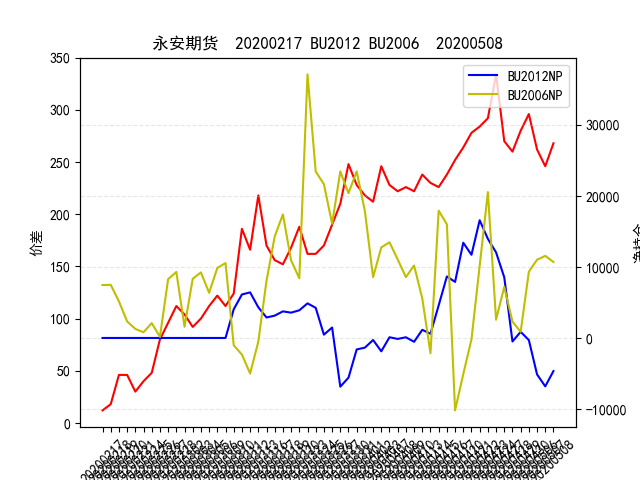

In [4]:
%matplotlib notebook
#二行即可搞定画图中文乱码
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 画图
dates=merge2['date']
plt.plot(dates,merge2['价差'],label='价差',color='r')
plt.ylabel('价差')
plt.tick_params(axis='x',rotation=45) #日期斜体
plt.twinx()
plt.plot(dates,merge2[净持仓1],label=净持仓1,color='b')
plt.plot(dates,merge2[净持仓2],label=净持仓2,color='y')
plt.legend()
plt.ylabel('净持仓')
plt.grid(linestyle="--", alpha=0.3)
plt.title(BrokerID+'  '+merge2['date'].iloc[0]+" "+symbol1+" "+symbol2+'  '+merge2['date'].iloc[-1])
plt.show()